In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [337]:
df = pd.read_csv(r"SampleSuperstore.csv")

In [372]:
df.head(2)

,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Ship_Mode
0,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2.0,0.0,41.913600,2.0
1,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,498.93,3.0,0.0,69.196838,2.0


In [339]:
df.drop(["Postal Code"],axis = 1,inplace =True)

In [340]:
df.shape

(9994, 12)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [342]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [343]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [344]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


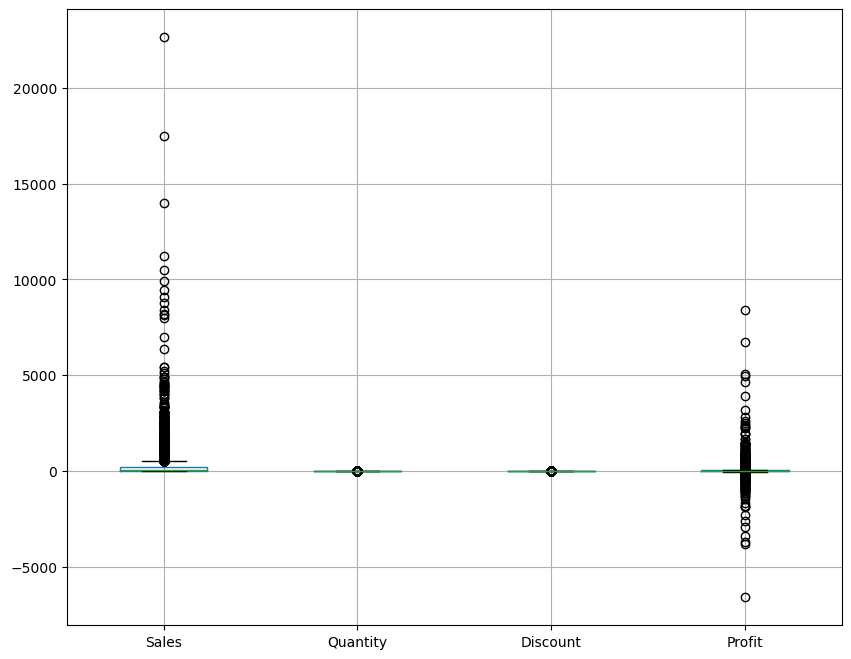

In [345]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
df.boxplot(column=['Sales', 'Quantity', 'Discount', 'Profit'],figsize=(10,8))

# Display the plot
plt.show()

In [346]:
# outlier founding

def outlierfinding(df,cols):
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
        
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    higher = q3 + (1.5 * iqr)
    
    print("lower bound",lower)
    print("higher bound",higher)
    
    outliers_df = df[(df[cols] < lower) | (df[cols] > higher)]
    
    return outliers_df

In [347]:
outlierfinding(df,'Sales')

lower bound -271.71000000000004
higher bound 498.93


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
10,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,1706.1840,9,0.20,85.3092
11,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,911.4240,4,0.20,68.3568
...,...,...,...,...,...,...,...,...,...,...,...,...
9931,Standard Class,Consumer,United States,San Bernardino,California,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9942,Standard Class,Consumer,United States,Anaheim,California,West,Office Supplies,Storage,998.8200,9,0.00,29.9646
9947,Second Class,Corporate,United States,Indianapolis,Indiana,Central,Furniture,Chairs,1925.8800,6,0.00,539.2464
9948,Second Class,Corporate,United States,Indianapolis,Indiana,Central,Office Supplies,Appliances,2405.2000,8,0.00,793.7160


In [348]:
df["Sales"] = df["Sales"].apply(lambda x : -271.71000000000004 if x < -271.71000000000004 else (498.93 if x > 498.93 else x))

In [349]:
df[(df["Sales"] < -271.71000000000004) | (df["Sales"] > 498.93)]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


In [350]:
outlierfinding(df,'Quantity')

lower bound -2.5
higher bound 9.5


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
113,Second Class,Consumer,United States,Columbus,Ohio,East,Office Supplies,Fasteners,40.096,14,0.2,14.5348
139,Standard Class,Consumer,United States,Roseville,California,West,Furniture,Furnishings,43.120,14,0.0,20.6976
147,Standard Class,Corporate,United States,Franklin,Wisconsin,Central,Technology,Phones,384.450,11,0.0,103.8015
251,Standard Class,Consumer,United States,San Diego,California,West,Technology,Accessories,498.930,13,0.0,636.0003
329,First Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Labels,100.240,10,0.2,33.8310
...,...,...,...,...,...,...,...,...,...,...,...,...
9882,First Class,Consumer,United States,Woodstock,Georgia,South,Technology,Accessories,272.610,13,0.0,98.1396
9895,Standard Class,Consumer,United States,Chicago,Illinois,Central,Technology,Accessories,153.824,11,0.2,38.4560
9941,Standard Class,Consumer,United States,San Francisco,California,West,Technology,Accessories,223.580,14,0.0,87.1962
9979,Standard Class,Home Office,United States,Los Angeles,California,West,Office Supplies,Binders,437.472,14,0.2,153.1152


In [351]:
df = df[~((df["Quantity"] < -2.5) | (df["Quantity"] > 9.5))]

In [352]:
df.shape

(9824, 12)

In [353]:
outlierfinding(df,'Quantity')

lower bound -2.5
higher bound 9.5


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


In [354]:
outlierfinding(df,'Discount')

lower bound -0.30000000000000004
higher bound 0.5


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
28,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Binders,9.618,2,0.7,-7.0532
32,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Binders,6.858,6,0.7,-5.7150
36,First Class,Corporate,United States,Richardson,Texas,Central,Furniture,Furnishings,190.920,5,0.6,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...
9870,First Class,Corporate,United States,Mason,Ohio,East,Office Supplies,Binders,22.428,3,0.7,-17.9424
9877,First Class,Home Office,United States,Cleveland,Ohio,East,Office Supplies,Binders,8.700,5,0.7,-6.3800
9903,Standard Class,Consumer,United States,Carrollton,Texas,Central,Furniture,Furnishings,25.128,3,0.6,-6.9102
9920,Standard Class,Corporate,United States,Bryan,Texas,Central,Office Supplies,Binders,22.386,7,0.8,-35.8176


In [355]:
df["Discount"] = df["Discount"].apply(lambda x : -0.30000000000000004 if x < -0.30000000000000004 else (0.5 if x > 0.5 else x))

In [356]:
outlierfinding(df,'Discount')

lower bound -0.30000000000000004
higher bound 0.5


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


In [357]:
outlierfinding(df,'Profit')

lower bound -38.7974625
higher bound 69.1968375


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,498.9300,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,498.9300,5,0.45,-383.0310
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,498.9300,6,0.20,90.7152
10,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,498.9300,9,0.20,85.3092
13,Standard Class,Consumer,United States,Seattle,Washington,West,Office Supplies,Binders,407.9760,3,0.20,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...
9948,Second Class,Corporate,United States,Indianapolis,Indiana,Central,Office Supplies,Appliances,498.9300,8,0.00,793.7160
9957,Standard Class,Home Office,United States,New Rochelle,New York,East,Office Supplies,Paper,223.9200,4,0.00,109.7208
9962,First Class,Home Office,United States,Houston,Texas,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704
9968,Standard Class,Consumer,United States,Plainfield,New Jersey,East,Office Supplies,Binders,498.9300,2,0.00,331.1910


In [358]:
df["Profit"] = df["Profit"].apply(lambda x : -38.7974625 if x < -38.7974625 else (69.1968375 if x > 69.1968375 else x))

In [359]:
outlierfinding(df,'Profit')

lower bound -38.7974625
higher bound 69.1968375


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


In [373]:
df.head(20)

,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Ship_Mode
0,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2.0,0.00,41.913600,2.0
1,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,498.930,3.0,0.00,69.196838,2.0
2,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620,2.0,0.00,6.871400,2.0
3,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,498.930,5.0,0.45,-38.797463,3.0
4,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2.0,0.20,2.516400,3.0
5,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.860,7.0,0.00,14.169400,3.0
6,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.280,4.0,0.00,1.965600,3.0
7,Consumer,United States,Los Angeles,California,West,Technology,Phones,498.930,6.0,0.20,69.196838,3.0
8,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,18.504,3.0,0.20,5.782500,3.0
9,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,114.900,5.0,0.00,34.470000,3.0


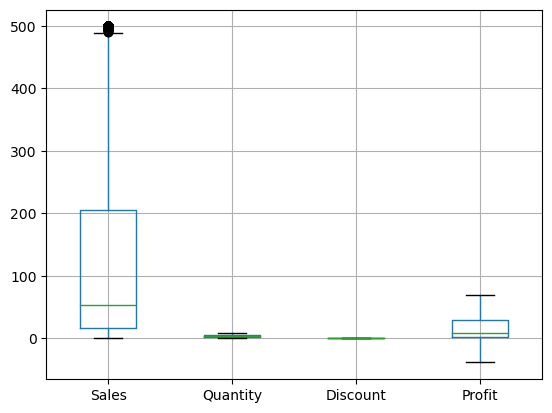

In [361]:
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

# Create box plots for numerical columns
df[numerical_cols].boxplot()

# Display the plot
plt.show()

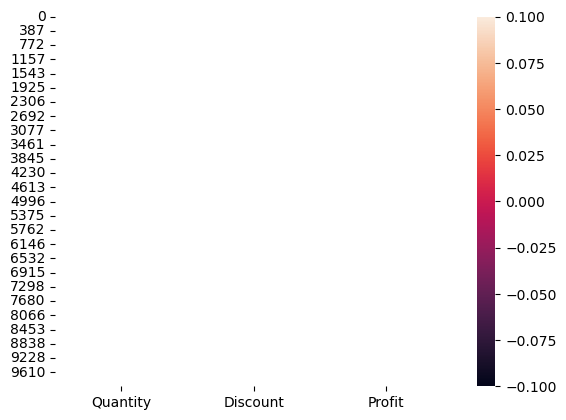

In [362]:
sns.heatmap(df.iloc[:,9:13],mask = True)
plt.show()

In [375]:
# Step 2: Sales Analysis
# Calculate total sales revenue
total_sales_revenue = df['Sales'].sum()
print("Total Sales Revenue:", total_sales_revenue)

Total Sales Revenue: 1359798.0384


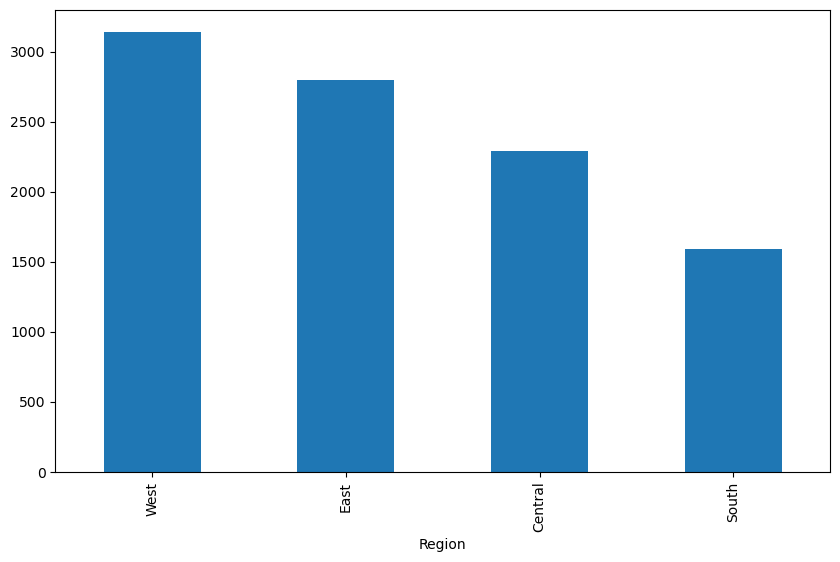

In [395]:
# Visualize total sales revenue
plt.figure(figsize=(10, 6))
df['Region'].value_counts().plot(kind='bar')
plt.show()

#### The bar plot depicting total sales revenue by region highlights the regions contributing the most to overall sales revenue. It identifies regions with the highest and lowest sales performances, which can be further analyzed to understand underlying factors influencing sales.

In [376]:
# Analyze sales by different segments
segment_sales = df.groupby('Segment')['Sales'].sum()
print("Segment-wise Sales:")
print(segment_sales)


Segment-wise Sales:
Segment
Consumer       700022.1928
Corporate      417714.8478
Home Office    242060.9978
Name: Sales, dtype: float64


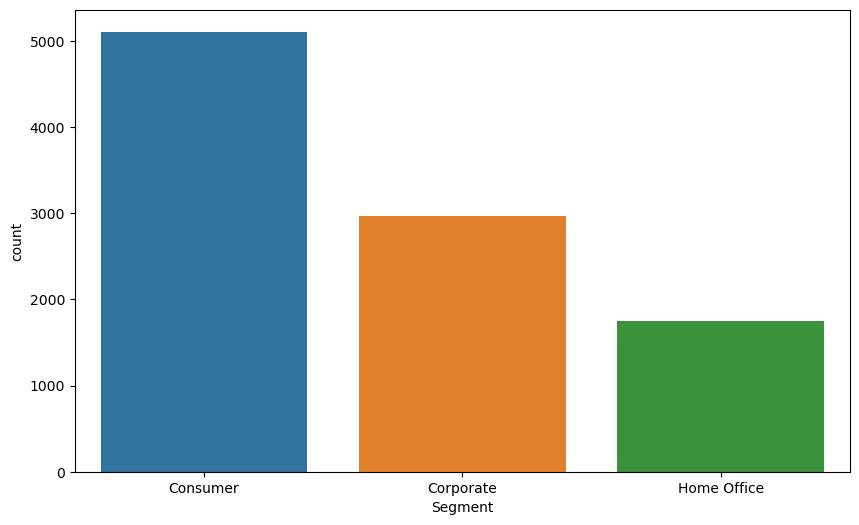

In [401]:
# Visualize customer demographics
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=df)
plt.show()

#### The count plot of customer segments provides insights into the distribution of customers across different segments. It helps in understanding the customer base and tailoring marketing efforts to target specific segments more effectively.

In [377]:
# Step 3: Product Analysis
# Identify bestselling products
bestselling_products = df.groupby('Sub-Category')['Quantity'].sum().nlargest(10)
print("Bestselling Products:")
print(bestselling_products)

Bestselling Products:
Sub-Category
Binders        5598.0
Paper          4933.0
Furnishings    3386.0
Phones         3123.0
Storage        2999.0
Art            2913.0
Accessories    2769.0
Chairs         2223.0
Appliances     1656.0
Labels         1310.0
Name: Quantity, dtype: float64


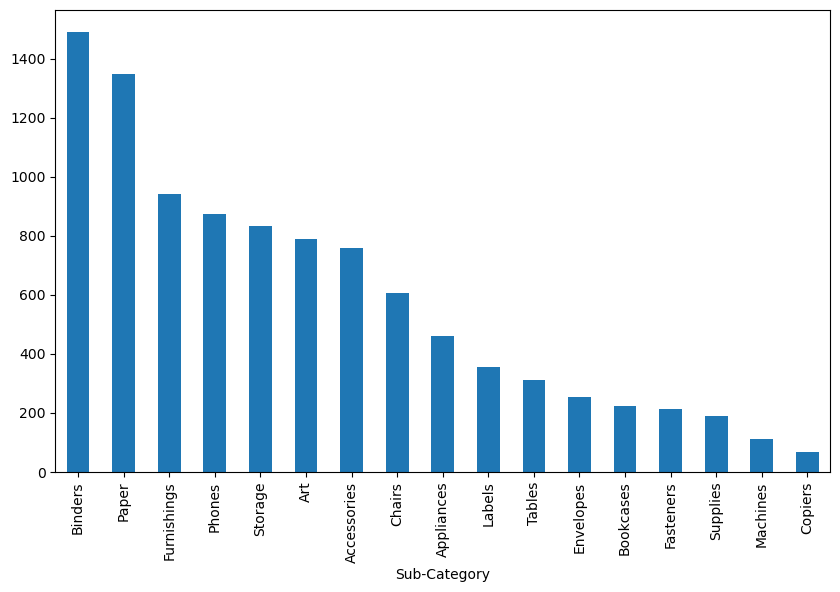

In [398]:
# Create bar plot for bestselling products
plt.figure(figsize=(10, 6))
df['Sub-Category'].value_counts().plot(kind='bar')
plt.show()

#### The bar plot illustrating the bestselling products by sub-category identifies the top-performing product categories in terms of sales quantity or revenue. It helps in focusing marketing and sales strategies on high-demand products.

In [378]:
# Analyze sales performance by product categories
category_sales = df.groupby('Category')['Sales'].sum()
print("Category-wise Sales:")
print(category_sales)

Category-wise Sales:
Category
Furniture          466153.2684
Office Supplies    477276.2390
Technology         416368.5310
Name: Sales, dtype: float64


In [386]:
# Step 4: Profitability Analysis
# Calculate profit margins
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

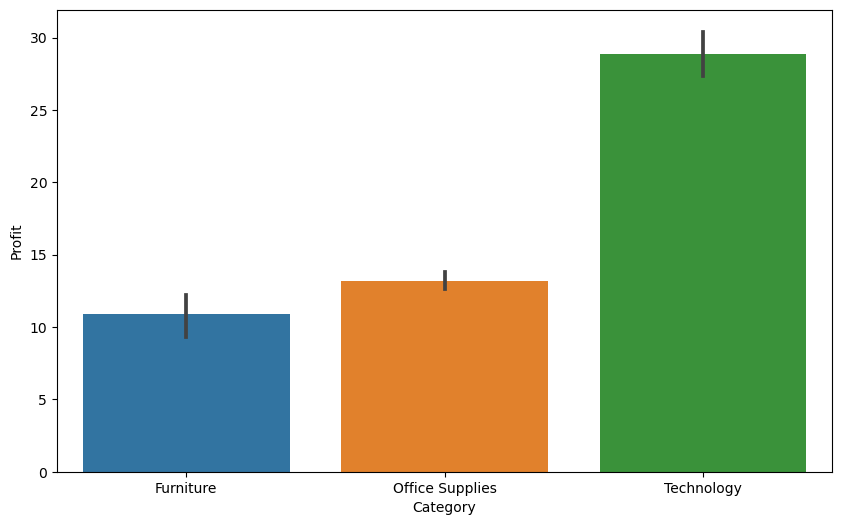

In [404]:
# Compare profit margins for different products
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=df)
plt.show()

#### The bar plot comparing profit margins for different product categories reveals which categories are more profitable. It enables strategic decision-making regarding product offerings and pricing strategies to maximize profitability.

In [387]:
# Identify products with highest profit margins
high_margin_products = df.groupby('Sub-Category')['Profit_Margin'].mean().nlargest(10)
print("Products with Highest Profit Margins:")
print(high_margin_products)

Products with Highest Profit Margins:
Sub-Category
Labels         42.441946
Paper          41.289291
Envelopes      40.701047
Fasteners      29.927725
Art            25.077052
Accessories    19.263053
Furnishings    14.957017
Copiers        14.152864
Supplies       11.961137
Phones         10.721666
Name: Profit_Margin, dtype: float64


In [388]:
# Step 6: Discount Analysis
# Analyze impact of discounts on sales
discount_effect = df.groupby('Discount')['Sales'].mean()
print("Effect of Discounts on Sales:")
print(discount_effect)

Effect of Discounts on Sales:
Discount
0.00    131.828260
0.10    312.453472
0.15    350.461070
0.20    134.668572
0.30    330.100222
0.32    327.645323
0.40    295.583310
0.45    380.363864
0.50     68.434491
Name: Sales, dtype: float64


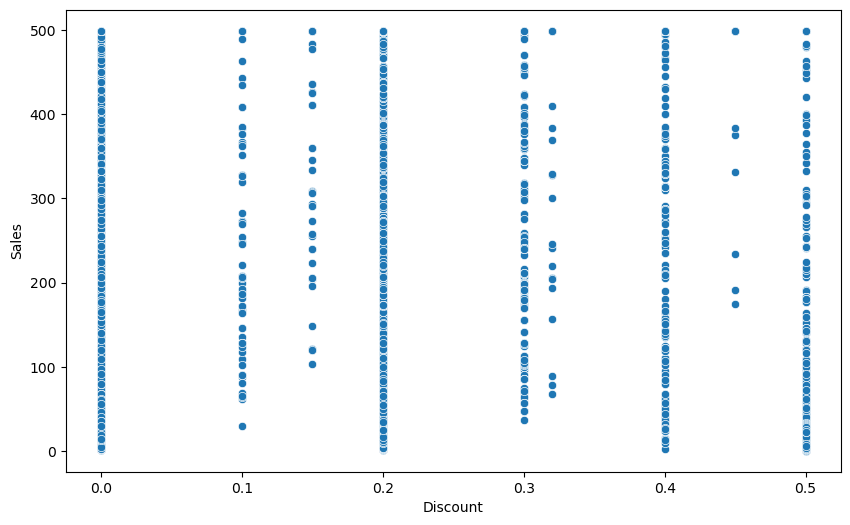

In [405]:
# Analyze impact of discounts on sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales', data=df)
plt.show()

#### The scatter plot analyzing the impact of discounts on sales volume shows the relationship between discount rates and sales revenue. It helps in determining the effectiveness of discounting strategies and optimizing discount levels for maximum sales impact.

In [389]:
# Step 7: Geographical Analysis
# Analyze sales performance across regions
region_sales = df.groupby('Region')['Sales'].sum()
print("Region-wise Sales:")
print(region_sales)


Region-wise Sales:
Region
Central    305900.7054
East       386316.1880
South      220334.3345
West       447246.8105
Name: Sales, dtype: float64


In [390]:
# Step 8: Segment Analysis
# Compare sales performance across segments
segment_sales_comparison = df.groupby('Segment')['Sales'].sum()
print("Segment-wise Sales Comparison:")
print(segment_sales_comparison)

Segment-wise Sales Comparison:
Segment
Consumer       700022.1928
Corporate      417714.8478
Home Office    242060.9978
Name: Sales, dtype: float64


#### Geographical analysis, if performed using maps, can provide insights into regional sales distribution and identify areas of high and low sales activity. It assists in targeting marketing efforts geographically and optimizing supply chain operations.

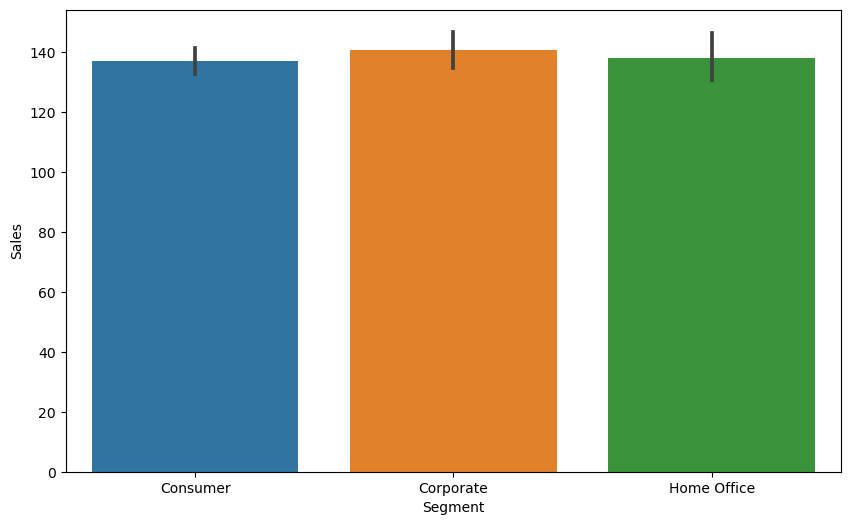

In [406]:
# Create bar plot to compare sales performance across segments
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=df)
plt.show()

#### The bar plot comparing sales performance across different customer segments highlights which segments contribute the most to overall sales. It guides segmentation strategies and customer relationship management efforts to prioritize high-value segments.